# CINNAMON AI LAB assignment : Content base recommender system

## Approach : 
>"We can choose which one that we prefer recommending it than recommending another by sorting distances between query object and all another objects"

I have no experience in NLP, so google is my senpai :D
My approach to solve this problem :
1. Preprocessing (Remove not important words)
2. Somehow represent the data as vectors  
3. Calculate distance with Euclid distance / cosine similarity of two vectors
4. Give recommendation

### My preprocessing and vectorization is based on these kernels :
- https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial
- https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda

## Upload data (actually get from drive)

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!cp drive/Assignment\ 1.zip .

In [5]:
!ls

Assignment 1.zip  datalab  drive


## Unzip and get csv file

In [6]:
!apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.


In [7]:
!unzip Assignment\ 1.zip

Archive:  Assignment 1.zip
   creating: Assignment 1/
  inflating: Assignment 1/Recommender system assignment.pptx  
   creating: __MACOSX/
   creating: __MACOSX/Assignment 1/
  inflating: __MACOSX/Assignment 1/._Recommender system assignment.pptx  
  inflating: Assignment 1/people_wiki.csv  
  inflating: __MACOSX/Assignment 1/._people_wiki.csv  


In [8]:
!ls Assignment\ 1

people_wiki.csv  Recommender system assignment.pptx


In [0]:
!cp Assignment\ 1/people_wiki.csv .

In [10]:
!ls

Assignment 1  Assignment 1.zip	datalab  drive	__MACOSX  people_wiki.csv


In [0]:
!rm -rf Assignment\ 1 Assignment\ 1.zip __MACOSX/

In [13]:
!ls

datalab  drive	people_wiki.csv


## Data exploring

In [14]:
!ls

datalab  drive	people_wiki.csv


In [0]:
import pandas as pd, numpy as np

In [0]:
raw_data = pd.read_csv('people_wiki.csv')

In [17]:
raw_data[0:5]

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [18]:
raw_data.shape

(59071, 3)

In [24]:
raw_data.tail(10)

,URI,name,text
59061,<http://dbpedia.org/resource/Rod_Wilt>,Rod Wilt,rod wilt is a former republican member of the ...
59062,<http://dbpedia.org/resource/Scott_Baker_(judge)>,Scott Baker (judge),sir thomas scott gillespie baker born 10 decem...
59063,<http://dbpedia.org/resource/Dragoljub_Ojdani%...,Dragoljub Ojdani%C4%87,dragoljub ojdani serbian cyrillic born june 1 ...
59064,<http://dbpedia.org/resource/Oz_Bengur>,Oz Bengur,osman oz bengur born february 23 1949 is an am...
59065,<http://dbpedia.org/resource/Dee_Brown_(basket...,"Dee Brown (basketball, born 1968)",decovan kadell dee brown born november 29 1968...
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...
59067,<http://dbpedia.org/resource/Scott_F._Crago>,Scott F. Crago,scott francis crago born july 26 1963 twin bro...
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...
59069,<http://dbpedia.org/resource/Keith_Elias>,Keith Elias,keith hector elias born february 3 1972 in lac...
59070,<http://dbpedia.org/resource/Fawaz_Damrah>,Fawaz Damrah,fawaz mohammed damrah arabic fawwz damra was t...


In [26]:
# Check for missing value : 
null_check=raw_data.isnull().sum()
print(null_check)

URI     0
name    0
text    0
dtype: int64


## Preprocessing

In [0]:
text = raw_data.text

In [0]:
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   
lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

In [0]:
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [40]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [39]:
nltk.download('punkt')

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

In [0]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [0]:
def clean(bio):
    """
    This function receives bio and returns clean word-list
    """
    #Convert to lower case , so that Hi and hi are the same
    bio=bio.lower()
    #remove \n
    bio=re.sub("\\n","",bio)
    
    #Split the sentences into words
    words=tokenizer.tokenize(bio)
    
    # (')aphostophe  replacement (ie)   you're --> you are  
    # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    words=[APPO[word] if word in APPO else word for word in words]
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    
    clean_sent=" ".join(words)
    # remove any non alphanum,digit character
    clean_sent=re.sub("\W+"," ",clean_sent)
    clean_sent=re.sub("  "," ",clean_sent)
    return(clean_sent)

In [51]:
text.iloc[10]

'sophia violet sophie crumb born september 27 1981 is an americanfrench comics artist she is the daughter of underground comix artists robert crumb and aline kominskycrumbcrumb was born in woodland california and lived in the nearby farming town of winters with her parents until she was nine years old in 1991 she relocated with her family to sauve a village in southern france her parents reported that they wanted to remove her from the political conservatives and christian fundamentalists of the united states in a 2010 interview sophie told the philadelphia inquirer that her mother was afraid sophie would turn into a valley girlit was after this relocation that terry zwigoff released crumb 1994 a critically acclaimed documentary film about sophies father and their family zwigoff later commissioned sophie to prepare some original drawings for inclusion in his 2001 comedydrama ghost world an adaptation of daniel clowes comics serial of the same nameafter completing her secondary educatio

In [52]:
clean(text.iloc[10])

'sophia violet sophie crumb bear september 27 1981 americanfrench comics artist daughter underground comix artists robert crumb aline kominskycrumbcrumb bear woodland california live nearby farm town winter parent nine years old 1991 relocate family sauve village southern france parent report want remove political conservatives christian fundamentalists unite state 2010 interview sophie tell philadelphia inquirer mother afraid sophie would turn valley girlit relocation terry zwigoff release crumb 1994 critically acclaim documentary film sophies father family zwigoff later commission sophie prepare original draw inclusion 2001 comedydrama ghost world adaptation daniel clowes comics serial nameafter complete secondary education france crumb study acrobatics clown french circus school live brooklyn mid 2000s sell comics street apprentice tattoo artist another stage earn live teach english foreign languageshe live southern france husband construction worker son eli bear 2009'

In [0]:
processed_data = [clean(bio) for bio in text]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [0]:
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(processed_data)

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

In [0]:
lda = LatentDirichletAllocation(n_components=30, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [63]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=30, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [0]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [66]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:climb expedition dive everest tight explorer cave tibet arctic ascent mountaineer pole climber route balloon buchanan underwater hutton flint diver polar noon patch optioned traverse antarctica extreme mira ridge hodgson attempt romano adventurer crowley altitude trait mcgregor pagan bodybuilding mare

Topic #1:mexico mexican mathematics mathematical theory ukraine ukrainian costa mathematician holocaust chen problem nazi azerbaijan cuba rica trauma viktor s marxist nicaragua differential soviet pp castillo rojas yiddish dalhousie dutton alvarez akademi haifa baku dp socialism luis lam valle hirsch conjecture

Topic #2:air force serve army russian military general officer chief command norwegian war commander chess unite service state staff bear operation soviet philippine navy medal moscow russia train deputy mission defense president norway graduate retire naval oslo august corp utah base

Topic #3:band play record jazz tour guitar rock musician perfo

In [0]:
topic_predict =  lda.transform(tf)

In [71]:
topic_predict.shape

(59071, 30)

Now each bio can be represented as a vector x where x_i is the score of this bio in the i_th topic

In [0]:
def Euclid_distance(x,y):   
  return np.sqrt(np.sum((x-y)**2))

In [81]:
Euclid_distance(topic_predict[0],topic_predict[1])

0.8925211548109863

In [0]:
from numpy.linalg import norm

In [0]:
def cosine_sim(x,y):
  return np.dot(x,y)/(norm(x) * norm(y))

The resulting similarity ranges from −1 meaning exactly opposite, to 1 meaning exactly the same, with 0 indicating orthogonality (decorrelation), and in-between values indicating intermediate similarity or dissimilarity.

In [84]:
cosine_sim(topic_predict[0],topic_predict[1]) #not so relate

0.024959630481331093

In [88]:
raw_data.index[raw_data['name'] == 'Olari Elts'][0]
    

59066

In [89]:
topic_predict[raw_data.index[raw_data['name'] == 'Olari Elts'][0]]

array([2.25225225e-04, 2.25225225e-04, 1.27832868e-02, 7.67253740e-03,
       6.98198198e-03, 2.25225225e-04, 2.25225225e-04, 2.25225225e-04,
       2.25225225e-04, 4.49918217e-02, 1.81558201e-02, 4.75225225e-02,
       2.25225225e-04, 6.44252260e-01, 5.50364116e-02, 2.25225225e-04,
       7.46688131e-02, 1.51694472e-02, 2.25225225e-04, 2.25225225e-04,
       2.25225225e-04, 2.25225225e-04, 2.25225225e-04, 2.25225225e-04,
       6.84858185e-02, 2.25225225e-04, 2.25225225e-04, 2.25225225e-04,
       2.25225225e-04, 2.25225225e-04])

In [0]:
def distance(name1, name2, func='Euclid'):
  index_1 = raw_data.index[raw_data['name'] == name1][0]
  index_2 = raw_data.index[raw_data['name'] == name2][0]
  if(func == 'Euclid'):
    return Euclid_distance(topic_predict[index_1],topic_predict[index_2])
  if(func == 'Cosine'):
    return cosine_sim(topic_predict[index_1],topic_predict[index_2])
    

In [91]:
distance('Digby Morrell','Alfred J. Lewy')

0.8925211548109863

In [92]:
distance('Digby Morrell','Alfred J. Lewy',func='Cosine')

0.024959630481331093

In [97]:
distance('Barack Obama', 'Joe Biden', func='Cosine')


0.9765742246108191

In [0]:
import time

In [0]:
def recommend(name,k,func=None):
  start_time = time.time()
  print(k,' recommendation indices for ',name)
  person_index = raw_data.index[raw_data['name'] == name][0]
  # calculate distance of person with all other 
  all_dist = []
  for other in raw_data['name']:
    if other != name:
      if func=='Cosine' :
        all_dist.append(distance(name,other,func)) # the bigger cosine sim values, the more similar -> 1/cosine value
      else :
        all_dist.append(1/distance(name,other)) # the smaller distance, the more similar
  # Get recommend list
  result = np.array(all_dist)
  recommend_index = result.argsort()[-k:][::-1] 
  print("Execute in %s seconds" % (time.time() - start_time))
  return recommend_index

In [118]:
A = recommend('Digby Morrell',10,func='Cosine')

10  recommendation indices for  Digby Morrell
Execute in 532.3217799663544 seconds


In [120]:
raw_data.loc[A].name

23915    Geoffrey Edwards (Canada)
17109             Carolyn Merchant
20080                 Keiji Hirose
41688                  Tom Whitman
7597      Derek Holland (activist)
10396              Herv%C3%A9 This
46261                Vince DiFiore
30710                     Rod Owen
32442               Mauro Prosperi
45653                     Alan Old
Name: name, dtype: object

In [0]:
def plot_recommendation(name,recommendation_indices):
  # first plot the data of input
  person_index = raw_data.index[raw_data['name'] == name][0]
  person_vector = topic_predict[person_index]
  plt.figure()
  plt.title('Vector of '+name)
  plt.bar(range(len(person_vector)), person_vector, align='center')
  for i in range(len(recommendation_indices)):
    index = recommendation_indices[i]
    person_vector = topic_predict[index]
    plt.figure()
    person_vector = topic_predict[index]
    plt.title('Recommendation #'+str(i+1) +": "+ raw_data.name[index])
    plt.bar(range(len(person_vector)), person_vector, align='center')
    

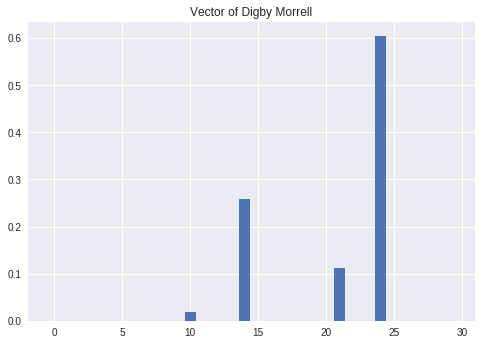

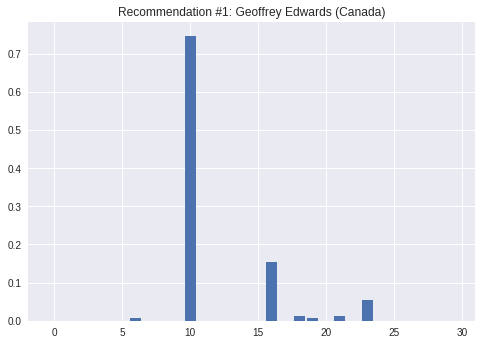

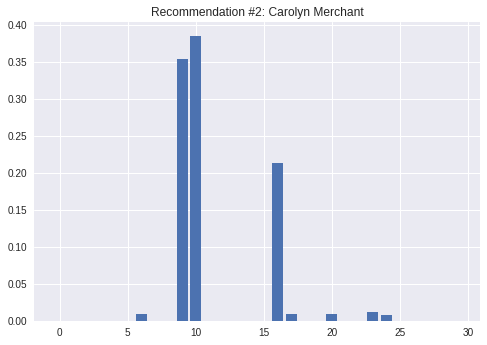

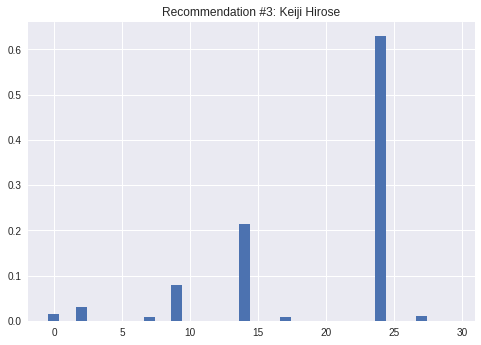

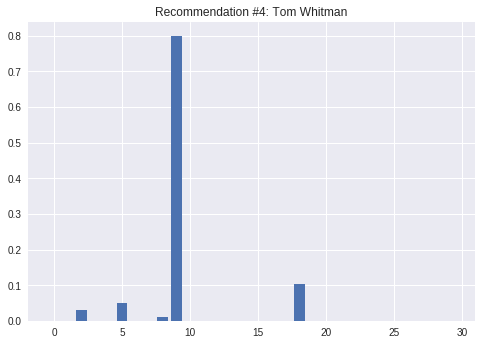

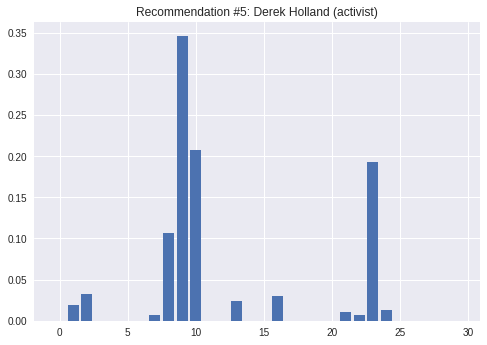

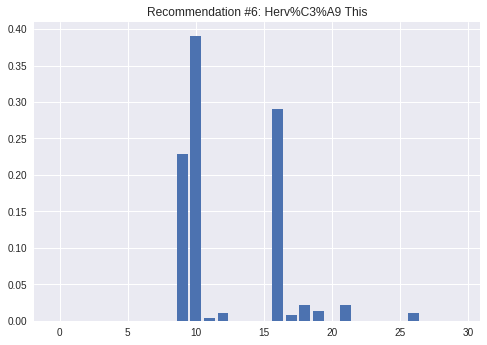

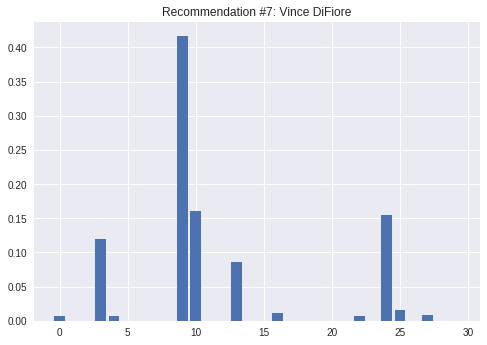

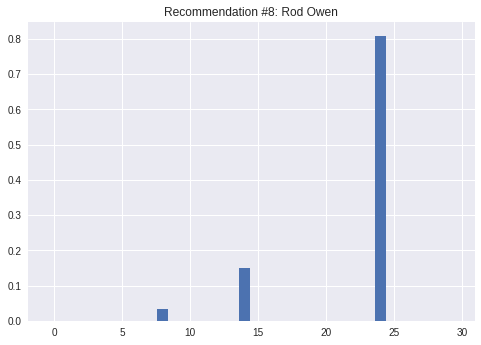

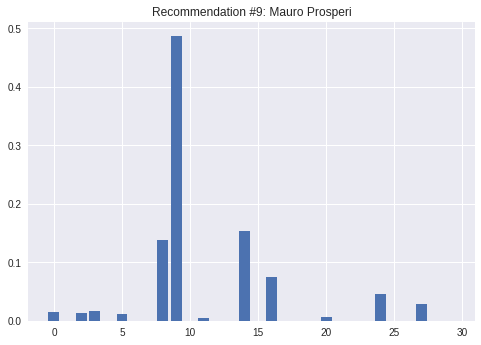

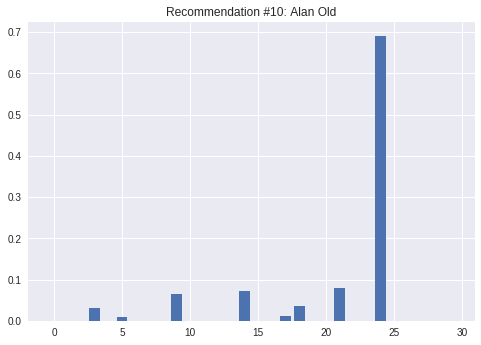

In [140]:
plot_recommendation('Digby Morrell',A)